<a href="https://colab.research.google.com/github/krucx/ML_from_scratch/blob/main/PCA_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
19989,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3946,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2877,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3567,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1209,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
405,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
539,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19291,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16075,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df[0].to_numpy()
print(Y.shape)
X = df.drop(0,axis=1)
X.shape

(20000,)


(20000, 784)

In [ ]:
X = X/256

In [ ]:
def pca(X,n=2):
  Sigma = np.cov(X.T.to_numpy())
  eig_val , eig_vec = np.linalg.eig(Sigma)
  indices = eig_val.argsort()
  sorted_eig_val = eig_val[indices]
  sorted_eig_vec = np.real(eig_vec[:,indices])
  explained_variances = []
  for i in range(2):
      explained_variances.append(np.real(sorted_eig_val[-i-1] / np.sum(sorted_eig_val)))
  U = np.flip(sorted_eig_vec[:,-n:],axis=1)
  X_transform = np.dot(X,U)
  return X_transform,explained_variances

In [ ]:
def plot_points(X_transform,Y,t='PCA on Handwritten Digits'):
  x=[]
  y=[]
  color=[]
  cmap = ["orange","b","g","r","c","m","indigo","y","k","tab:brown"]
  pop = []
  for i in range(0,len(cmap)):
    pop.append(mpatches.Patch(color=cmap[i], label=i))
  for i in range(X_transform.shape[0]):
    x.append(X_transform[i][0])
    y.append(X_transform[i][1])
    color.append(cmap[Y[i]])
  plt.figure(figsize=(10,5))
  plt.scatter(x,y,c=color)
  plt.legend(handles=pop)
  plt.title(t)

(20000, 2)
[0.09722170877984182, 0.07078097177433013]


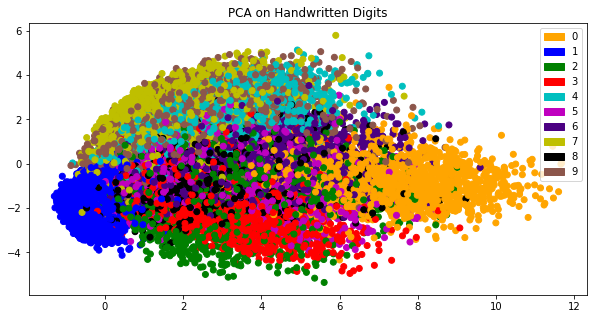

In [ ]:
X_transform,explained_variances = pca(X,2)
print(X_transform.shape)
print(explained_variances) 
plot_points(X_transform,Y)

(20000, 2)
[0.09722171 0.07078097]


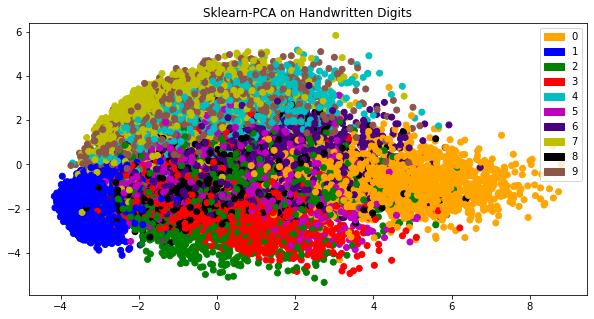

In [ ]:
# Using sklearn
pca1 = PCA(n_components=2)
pca1_transform = pca1.fit_transform(X)
print(pca1_transform.shape)
print(pca1.explained_variance_ratio_)
plot_points(pca1_transform,Y,"Sklearn-PCA on Handwritten Digits")